# Crime data in Los Angeles

About the Dataset
The dataset that will be presented in the next lines is available on the Los Angeles Open Data, for this purpose, I’ve used the dataset covers crime incidents in Los Angeles between the years of 2020 and 2021. The original file has 28 columns and 407199 rows. 

In [1]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import norm
import plotly.express as px

In [2]:
#Loading Dataset into a dataframe
df=pd.read_csv("Los_Angeles_Crime.csv")
df

RECORD_NUMBER           DATE_REPORTED         DATE_OCCURRENCE  \
0            10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM   
1           190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM   
2           200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM   
3           191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM   
4           191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM   
...               ...                     ...                     ...   
407194      211421071  11/07/2021 12:00:00 AM  11/07/2021 12:00:00 AM   
407195      210516671  12/01/2021 12:00:00 AM  12/01/2021 12:00:00 AM   
407196      210217231  11/06/2021 12:00:00 AM  11/05/2021 12:00:00 AM   
407197      210312887  07/12/2021 12:00:00 AM  07/12/2021 12:00:00 AM   
407198      212005847  02/22/2021 12:00:00 AM  02/22/2021 12:00:00 AM   

        TIME_OF_OCCURRENCE  AREA    AREA_NAME  RPT_DIST_NO  PART_1_2  \
0                     2230     3    Southwest          377         2   
1                      330     1      Central          163         2   
2                     1200     1      Central          155         2   
3                     1730    15  N Hollywood         1543         2   
4                      415    19      Mission         1998         2   
...                    ...   ...          ...          ...       ...   
407194                 100    14      Pacific         1431         1   
407195                1430     5       Harbor          585         2   
407196                2300     2      Rampart          235         1   
407197                1200     3    Southwest          363         1   
407198                1200    20      Olympic         2034         1   

        CRIME_CODE                                      CRIME_CD_DESC  ...  \
0              624                           BATTERY - SIMPLE ASSAULT  ...   
1              624                           BATTERY - SIMPLE ASSAULT  ...   
2              845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...   
3              745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...   
4              740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   
...            ...                                                ...  ...   
407194         761                                    BRANDISH WEAPON  ...   
407195         740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   
407196         510                                   VEHICLE - STOLEN  ...   
407197         350                                      THEFT, PERSON  ...   
407198         510                                   VEHICLE - STOLEN  ...   

       STATUS   STATUS_DESC CRIME_CODE_1 CRIME_CODE_2  CRIME_CODE_3  \
0          AO   Adult Other        624.0          NaN           NaN   
1          IC   Invest Cont        624.0          NaN           NaN   
2          AA  Adult Arrest        845.0          NaN           NaN   
3          IC   Invest Cont        745.0        998.0           NaN   
4          IC   Invest Cont        740.0          NaN           NaN   
...       ...           ...          ...          ...           ...   
407194     IC   Invest Cont        761.0          NaN           NaN   
407195     AO   Adult Other        740.0          NaN           NaN   
407196     IC   Invest Cont        510.0          NaN           NaN   
407197     IC   Invest Cont        350.0          NaN           NaN   
407198     IC   Invest Cont        510.0          NaN           NaN   

       CRIME_CODE_4                                  LOCATION  \
0               NaN   1100 W  39TH                         PL   
1               NaN    700 S  HILL                         ST   
2               NaN    200 E  6TH                          ST   
3               NaN   5400    CORTEEN                      PL   
4               NaN  14400    TITUS                        ST   
...             ...                                       ...   
407194          NaN  

Preliminary Analysis
Before deep dive inside the data frame, we need to check his head, tail, column names, shape, variable types, information, range of index, Descriptive Statistics and the missing values.

In [3]:
#Check the first 5 rows of the data
df.head()

RECORD_NUMBER           DATE_REPORTED         DATE_OCCURRENCE  \
0       10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM   
1      190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM   
2      200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM   
3      191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM   
4      191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM   

   TIME_OF_OCCURRENCE  AREA    AREA_NAME  RPT_DIST_NO  PART_1_2  CRIME_CODE  \
0                2230     3    Southwest          377         2         624   
1                 330     1      Central          163         2         624   
2                1200     1      Central          155         2         845   
3                1730    15  N Hollywood         1543         2         745   
4                 415    19      Mission         1998         2         740   

                                       CRIME_CD_DESC  ... STATUS  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    STATUS_DESC CRIME_CODE_1 CRIME_CODE_2  CRIME_CODE_3 CRIME_CODE_4  \
0   Adult Other        624.0          NaN           NaN          NaN   
1   Invest Cont        624.0          NaN           NaN          NaN   
2  Adult Arrest        845.0          NaN           NaN          NaN   
3   Invest Cont        745.0        998.0           NaN          NaN   
4   Invest Cont        740.0          NaN           NaN          NaN   

                                   LOCATION CROSS_STREET      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [4]:
#Check the last 5 rows of the data
df.tail()

RECORD_NUMBER           DATE_REPORTED         DATE_OCCURRENCE  \
407194      211421071  11/07/2021 12:00:00 AM  11/07/2021 12:00:00 AM   
407195      210516671  12/01/2021 12:00:00 AM  12/01/2021 12:00:00 AM   
407196      210217231  11/06/2021 12:00:00 AM  11/05/2021 12:00:00 AM   
407197      210312887  07/12/2021 12:00:00 AM  07/12/2021 12:00:00 AM   
407198      212005847  02/22/2021 12:00:00 AM  02/22/2021 12:00:00 AM   

        TIME_OF_OCCURRENCE  AREA  AREA_NAME  RPT_DIST_NO  PART_1_2  \
407194                 100    14    Pacific         1431         1   
407195                1430     5     Harbor          585         2   
407196                2300     2    Rampart          235         1   
407197                1200     3  Southwest          363         1   
407198                1200    20    Olympic         2034         1   

        CRIME_CODE                                      CRIME_CD_DESC  ...  \
407194         761                                    BRANDISH WEAPON  ...   
407195         740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   
407196         510                                   VEHICLE - STOLEN  ...   
407197         350                                      THEFT, PERSON  ...   
407198         510                                   VEHICLE - STOLEN  ...   

       STATUS  STATUS_DESC CRIME_CODE_1 CRIME_CODE_2  CRIME_CODE_3  \
407194     IC  Invest Cont        761.0          NaN           NaN   
407195     AO  Adult Other        740.0          NaN           NaN   
407196     IC  Invest Cont        510.0          NaN           NaN   
407197     IC  Invest Cont        350.0          NaN           NaN   
407198     IC  Invest Cont        510.0          NaN           NaN   

       CRIME_CODE_4                                 LOCATION  \
407194          NaN    00    WINDWARD                     AV   
407195          NaN  1900 S  GRAND                        AV   
407196          NaN  2300    MIRAMAR                      ST   
407197          NaN          CRENSHAW                     BL   
407198          NaN  3300 W  8TH                          ST   

                           CROSS_STREET      LAT       LON  
407194                              NaN  33.9873 -118.4729  
407195                              NaN  33.7270 -118.2902  
407196                              NaN  34.0649 -118.2741  
407197  STOCKER                      ST  34.0088 -118.3351  
407198                              NaN  34.0596 -118.3022  

[5 rows x 28 columns]

In [5]:
#Check columns
df.columns

Index(['RECORD_NUMBER', 'DATE_REPORTED', 'DATE_OCCURRENCE',
       'TIME_OF_OCCURRENCE', 'AREA', 'AREA_NAME', 'RPT_DIST_NO', 'PART_1_2',
       'CRIME_CODE', 'CRIME_CD_DESC', 'MOCODES', 'VICTIM_AGE', 'VICTIM_SEX',
       'VICTIM_DESCENT', 'PREMIS_CD', 'PREMIS_DESC', 'WEAPON_USED_CODE',
       'WEAPON_DESC', 'STATUS', 'STATUS_DESC', 'CRIME_CODE_1', 'CRIME_CODE_2',
       'CRIME_CODE_3', 'CRIME_CODE_4', 'LOCATION', 'CROSS_STREET', 'LAT',
       'LON'],
      dtype='object')

In [6]:
#Check the number of rows and colums
df.shape

(407199, 28)

In [7]:
#Check types of Data
df.dtypes

RECORD_NUMBER           int64
DATE_REPORTED          object
DATE_OCCURRENCE        object
TIME_OF_OCCURRENCE      int64
AREA                    int64
AREA_NAME              object
RPT_DIST_NO             int64
PART_1_2                int64
CRIME_CODE              int64
CRIME_CD_DESC          object
MOCODES                object
VICTIM_AGE              int64
VICTIM_SEX             object
VICTIM_DESCENT         object
PREMIS_CD             float64
PREMIS_DESC            object
WEAPON_USED_CODE      float64
WEAPON_DESC            object
STATUS                 object
STATUS_DESC            object
CRIME_CODE_1          float64
CRIME_CODE_2          float64
CRIME_CODE_3          float64
CRIME_CODE_4          float64
LOCATION               object
CROSS_STREET           object
LAT                   float64
LON                   float64
dtype: object

In [8]:
#check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407199 entries, 0 to 407198
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RECORD_NUMBER       407199 non-null  int64  
 1   DATE_REPORTED       407199 non-null  object 
 2   DATE_OCCURRENCE     407199 non-null  object 
 3   TIME_OF_OCCURRENCE  407199 non-null  int64  
 4   AREA                407199 non-null  int64  
 5   AREA_NAME           407199 non-null  object 
 6   RPT_DIST_NO         407199 non-null  int64  
 7   PART_1_2            407199 non-null  int64  
 8   CRIME_CODE          407199 non-null  int64  
 9   CRIME_CD_DESC       407199 non-null  object 
 10  MOCODES             350928 non-null  object 
 11  VICTIM_AGE          407199 non-null  int64  
 12  VICTIM_SEX          353458 non-null  object 
 13  VICTIM_DESCENT      353453 non-null  object 
 14  PREMIS_CD           407194 non-null  float64
 15  PREMIS_DESC         407039 non-nul

In [9]:
#Shows the range of index
df.index

RangeIndex(start=0, stop=407199, step=1)

In [10]:
#Descriptive Statistics
df.describe()

RECORD_NUMBER  TIME_OF_OCCURRENCE           AREA    RPT_DIST_NO  \
count   4.071990e+05       407199.000000  407199.000000  407199.000000   
mean    2.065638e+08         1349.037751      10.798059    1126.035845   
std     5.383830e+06          650.629620       6.049702     605.081089   
min     8.170000e+02            1.000000       1.000000     101.000000   
25%     2.012101e+08          915.000000       6.000000     631.000000   
50%     2.101217e+08         1430.000000      11.000000    1148.000000   
75%     2.112125e+08         1900.000000      16.000000    1621.000000   
max     2.221167e+08         2359.000000      21.000000    2199.000000   

            PART_1_2     CRIME_CODE     VICTIM_AGE      PREMIS_CD  \
count  407199.000000  407199.000000  407199.000000  407194.000000   
mean        1.413304     506.853057      30.056125     297.867329   
std         0.492427     209.850665      21.718318     214.567976   
min         1.000000     110.000000      -1.000000     101.000000   
25%         1.000000     330.000000      12.000000     101.000000   
50%         1.000000     480.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     971.000000   

       WEAPON_USED_CODE   CRIME_CODE_1  CRIME_CODE_2  CRIME_CODE_3  \
count     146379.000000  407195.000000  32357.000000   1109.000000   
mean         362.055466     506.579722    954.042247    981.797115   
std          123.375867     209.642837    116.782385     55.751490   
min          101.000000     110.000000    210.000000    434.000000   
25%          308.000000     330.000000    998.000000    998.000000   
50%          400.000000     480.000000    998.000000    998.000000   
75%          400.000000     626.000000    998.000000    998.000000   
max          516.000000     956.000000    999.000000    999.000000   

       CRIME_CODE_4            LAT            LON  
count     35.000000  407199.000000  407199.000000  
mean     988.514286      33.883775    -117.696539  
std       34.534187       2.536639       8.803116  
min      821.000000       0.000000    -118.667600  
25%      998.000000      34.010400    -118.430600  
50%      998.000000      34.058200    -118.322500  
75%      998.000000      34.163800    -118.274300  
max      999.000000      34.334300       0.000000

In [11]:
#Check Null Values
df.isnull().sum()

RECORD_NUMBER              0
DATE_REPORTED              0
DATE_OCCURRENCE            0
TIME_OF_OCCURRENCE         0
AREA                       0
AREA_NAME                  0
RPT_DIST_NO                0
PART_1_2                   0
CRIME_CODE                 0
CRIME_CD_DESC              0
MOCODES                56271
VICTIM_AGE                 0
VICTIM_SEX             53741
VICTIM_DESCENT         53746
PREMIS_CD                  5
PREMIS_DESC              160
WEAPON_USED_CODE      260820
WEAPON_DESC           260820
STATUS                     0
STATUS_DESC                0
CRIME_CODE_1               4
CRIME_CODE_2          374842
CRIME_CODE_3          406090
CRIME_CODE_4          407164
LOCATION                   0
CROSS_STREET          336150
LAT                        0
LON                        0
dtype: int64

In [12]:
#Check missing values
df.isna()

RECORD_NUMBER  DATE_REPORTED  DATE_OCCURRENCE  TIME_OF_OCCURRENCE  \
0               False          False            False               False   
1               False          False            False               False   
2               False          False            False               False   
3               False          False            False               False   
4               False          False            False               False   
...               ...            ...              ...                 ...   
407194          False          False            False               False   
407195          False          False            False               False   
407196          False          False            False               False   
407197          False          False            False               False   
407198          False          False            False               False   

         AREA  AREA_NAME  RPT_DIST_NO  PART_1_2  CRIME_CODE  CRIME_CD_DESC  \
0       False      False        False     False       False          False   
1       False      False        False     False       False          False   
2       False      False        False     False       False          False   
3       False      False        False     False       False          False   
4       False      False        False     False       False          False   
...       ...        ...          ...       ...         ...            ...   
407194  False      False        False     False       False          False   
407195  False      False        False     False       False          False   
407196  False      False        False     False       False          False   
407197  False      False        False     False       False          False   
407198  False      False        False     False       False          False   

        ...  STATUS  STATUS_DESC  CRIME_CODE_1  CRIME_CODE_2  CRIME_CODE_3  \
0       ...   False        False         False          True          True   
1       ...   False        False         False          True          True   
2       ...   False        False         False          True          True   
3       ...   False        False         False         False          True   
4       ...   False        False         False          True          True   
...     ...     ...          ...           ...           ...           ...   
407194  ...   False        False         False          True          True   
407195  ...   False        False         False          True          True   
407196  ...   False        False         False          True          True   
407197  ...   False        False         False          True          True   
407198  ...   False        False         False          True          True   

        CRIME_CODE_4  LOCATION  CROSS_STREET    LAT    LON  
0               True     False          True  False  False  
1               True     False          True  False  False  
2               True     False          True  False  False  
3               True     False          True  False  False  
4               True     False          True  False  False  
...              ...       ...           ...    ...    ...  
407194          True     False          True  False  False  
407195          True     False          True  False  False  
407196          True     False          True  False  False  
407197          True     False         False  False  False  
407198          True     False          True  False  False  

[407199 rows x 28 columns]

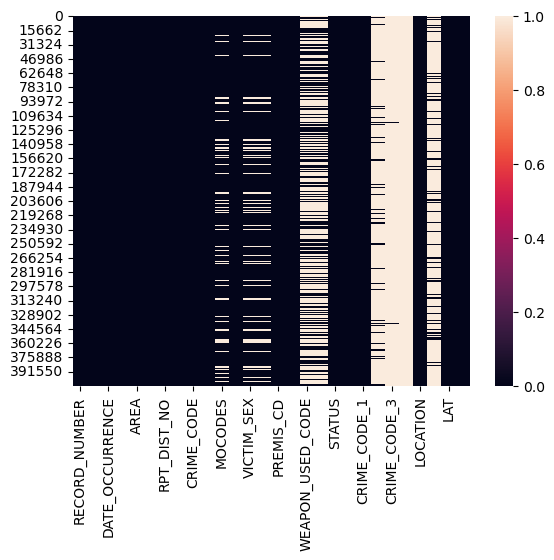

In [13]:
# Display missing data by Seaborn heatmap function
sns.heatmap(df.isnull())
plt.show()

Heatmap shows that null values are present in columns:

MOCODES  
VICTIM_SEX
VICTIM_DESCENT 
PREMIS_CD 
PREMIS_DESC 
WEAPON_USED_CODE
WEAPON_DESC  
CRIME_CODE_1
CRIME_CODE_2 
CRIME_CODE_3
CRIME_CODE_4 
CROSS_STREET 

# Missing Data 
As we saw in the preliminary analysis, I will drop the dataframe contains unnecessary columns and some blank rows: 'DATE_REPORTED', 'DATE_OCCURRENCE', 'AREA', 'RPT_DIST_NO', 'PART_1_2', 'MOCODES', 'VICTIM_DESCENT', 'STATUS', 'STATUS_DESC', 'CRIME_CODE_1', 'CRIME_CODE_2', 'CRIME_CODE_3', 'CRIME_CODE_4', 'CROSS_STREET', 'LOCATION'. So the visualization and cleaning becomes easy.

In [14]:
# Drop unnecessary columns (including missing value columns)
df.drop(['DATE_REPORTED', 'DATE_OCCURRENCE', 'AREA', 'RPT_DIST_NO', 'PART_1_2', 'MOCODES', 'VICTIM_DESCENT', 'STATUS', 'STATUS_DESC',  'CRIME_CODE_1', 'CRIME_CODE_2', 'CRIME_CODE_3', 'CRIME_CODE_4', 'CROSS_STREET', 'LOCATION'], axis=1, inplace=True)
df

RECORD_NUMBER  TIME_OF_OCCURRENCE    AREA_NAME  CRIME_CODE  \
0            10304468                2230    Southwest         624   
1           190101086                 330      Central         624   
2           200110444                1200      Central         845   
3           191501505                1730  N Hollywood         745   
4           191921269                 415      Mission         740   
...               ...                 ...          ...         ...   
407194      211421071                 100      Pacific         761   
407195      210516671                1430       Harbor         740   
407196      210217231                2300      Rampart         510   
407197      210312887                1200    Southwest         350   
407198      212005847                1200      Olympic         510   

                                            CRIME_CD_DESC  VICTIM_AGE  \
0                                BATTERY - SIMPLE ASSAULT          36   
1                                BATTERY - SIMPLE ASSAULT          25   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE           0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)          76   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...          31   
...                                                   ...         ...   
407194                                    BRANDISH WEAPON          36   
407195  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...          19   
407196                                   VEHICLE - STOLEN           0   
407197                                      THEFT, PERSON          15   
407198                                   VEHICLE - STOLEN           0   

       VICTIM_SEX  PREMIS_CD                                   PREMIS_DESC  \
0               F      501.0                        SINGLE FAMILY DWELLING   
1               M      102.0                                      SIDEWALK   
2               X      726.0                               POLICE FACILITY   
3               F      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4               X      409.0                           BEAUTY SUPPLY STORE   
...           ...        ...                                           ...   
407194          M      117.0                                         BEACH   
407195          F      122.0                      VEHICLE, PASSENGER/TRUCK   
407196        NaN      101.0                                        STREET   
407197          F      101.0                                        STREET   
407198        NaN      101.0                                        STREET   

        WEAPON_USED_CODE                                     WEAPON_DESC  \
0                  400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
1                  500.0                     UNKNOWN WEAPON/OTHER WEAPON   
2                    NaN                                             NaN   
3                    NaN                                             NaN   
4                    NaN                                             NaN   
...                  ...                                             ...   
407194             200.0                KNIFE WITH BLADE 6INCHES OR LESS   
407195               NaN                                             NaN   
407196               NaN                                             NaN   
407197               NaN                                             NaN   
407198               NaN                                             NaN   

            LAT       LON  
0       34.0141 -118.2978  
1       34.0459 -118.2545  
2       34.0448 -118.2474  
3       34.1685 -118.4019  
4       34.2198 -118.4468  
...         ...       ...  
407194  33.9873 -118.4729  
407195  33.7270 -118.2902  
407196  34.0649 -118.2741  
407197  34.0088 -118.3351  
407198  34.0596 -118.3022  

[407199 rows x 13 columns]

In [15]:
# Drop rows contains missing values
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

RECORD_NUMBER  TIME_OF_OCCURRENCE    AREA_NAME  CRIME_CODE  \
0            10304468                2230    Southwest         624   
1           190101086                 330      Central         624   
2           200100501                  30      Central         121   
3           200100509                2200      Central         330   
4           200100510                 955      Central         930   
...               ...                 ...          ...         ...   
146278      212110947                2135      Topanga         624   
146279      211225063                1840  77th Street         624   
146280      211512994                1840  N Hollywood         626   
146281      210506531                2210       Harbor         434   
146282      211421071                 100      Pacific         761   

                                 CRIME_CD_DESC  VICTIM_AGE VICTIM_SEX  \
0                     BATTERY - SIMPLE ASSAULT          36          F   
1                     BATTERY - SIMPLE ASSAULT          25          M   
2                               RAPE, FORCIBLE          25          F   
3                        BURGLARY FROM VEHICLE          29          M   
4       CRIMINAL THREATS - NO WEAPON DISPLAYED          35          M   
...                                        ...         ...        ...   
146278                BATTERY - SIMPLE ASSAULT          44          M   
146279                BATTERY - SIMPLE ASSAULT          59          F   
146280       INTIMATE PARTNER - SIMPLE ASSAULT          38          F   
146281                      FALSE IMPRISONMENT          41          F   
146282                         BRANDISH WEAPON          36          M   

        PREMIS_CD                                   PREMIS_DESC  \
0           501.0                        SINGLE FAMILY DWELLING   
1           102.0                                      SIDEWALK   
2           735.0               NIGHT CLUB (OPEN EVENINGS ONLY)   
3           101.0                                        STREET   
4           108.0                                   PARKING LOT   
...           ...                                           ...   
146278      101.0                                        STREET   
146279      101.0                                        STREET   
146280      108.0                                   PARKING LOT   
146281      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
146282      117.0                                         BEACH   

        WEAPON_USED_CODE                                     WEAPON_DESC  \
0                  400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
1                  500.0                     UNKNOWN WEAPON/OTHER WEAPON   
2                  500.0                     UNKNOWN WEAPON/OTHER WEAPON   
3                  306.0                              ROCK/THROWN OBJECT   
4                  511.0                                   VERBAL THREAT   
...                  ...                                             ...   
146278             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
146279             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
146280             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
146281             200.0                KNIFE WITH BLADE 6INCHES OR LESS   
146282             200.0                KNIFE WITH BLADE 6INCHES OR LESS   

            LAT       LON  
0       34.0141 -118.2978  
1       34.0459 -118.2545  
2       34.0452 -118.2534  
3       34.0359 -118.2648  
4       34.0615 -118.2412  
...         ...       ...  
146278  34.1855 -118.6296  
146279  33.9987 -118.2915  
146280  34.1867 -118.3965  
146281  33.7424 -118.2814  
146282  33.9873 -118.4729  

[146283 rows x 13 columns]

In [16]:
#check the first 5 rows after cleaning data
df.head(5)

RECORD_NUMBER  TIME_OF_OCCURRENCE  AREA_NAME  CRIME_CODE  \
0       10304468                2230  Southwest         624   
1      190101086                 330    Central         624   
2      200100501                  30    Central         121   
3      200100509                2200    Central         330   
4      200100510                 955    Central         930   

                            CRIME_CD_DESC  VICTIM_AGE VICTIM_SEX  PREMIS_CD  \
0                BATTERY - SIMPLE ASSAULT          36          F      501.0   
1                BATTERY - SIMPLE ASSAULT          25          M      102.0   
2                          RAPE, FORCIBLE          25          F      735.0   
3                   BURGLARY FROM VEHICLE          29          M      101.0   
4  CRIMINAL THREATS - NO WEAPON DISPLAYED          35          M      108.0   

                       PREMIS_DESC  WEAPON_USED_CODE  \
0           SINGLE FAMILY DWELLING             400.0   
1                         SIDEWALK             500.0   
2  NIGHT CLUB (OPEN EVENINGS ONLY)             500.0   
3                           STREET             306.0   
4                      PARKING LOT             511.0   

                                      WEAPON_DESC      LAT       LON  
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  34.0141 -118.2978  
1                     UNKNOWN WEAPON/OTHER WEAPON  34.0459 -118.2545  
2                     UNKNOWN WEAPON/OTHER WEAPON  34.0452 -118.2534  
3                              ROCK/THROWN OBJECT  34.0359 -118.2648  
4                                   VERBAL THREAT  34.0615 -118.2412

In [17]:
#Check Null Values again
df.isnull().sum()

RECORD_NUMBER         0
TIME_OF_OCCURRENCE    0
AREA_NAME             0
CRIME_CODE            0
CRIME_CD_DESC         0
VICTIM_AGE            0
VICTIM_SEX            0
PREMIS_CD             0
PREMIS_DESC           0
WEAPON_USED_CODE      0
WEAPON_DESC           0
LAT                   0
LON                   0
dtype: int64

In [18]:
#Check the new statistical data for each column after cleaning data
df.describe()

RECORD_NUMBER  TIME_OF_OCCURRENCE     CRIME_CODE     VICTIM_AGE  \
count   1.462830e+05       146283.000000  146283.000000  146283.000000   
mean    2.062732e+08         1354.687647     507.984045      34.515514   
std     5.227153e+06          672.932375     240.481634      17.768087   
min     1.030447e+07            1.000000     110.000000      -1.000000   
25%     2.012075e+08          915.000000     230.000000      24.000000   
50%     2.101095e+08         1440.000000     624.000000      33.000000   
75%     2.112053e+08         1920.000000     626.000000      47.000000   
max     2.221140e+08         2359.000000     956.000000      99.000000   

           PREMIS_CD  WEAPON_USED_CODE            LAT            LON  
count  146283.000000     146283.000000  146283.000000  146283.000000  
mean      312.147850        362.123063      33.868263    -117.668551  
std       213.463888        123.325901       2.560793       8.889273  
min       101.000000        101.000000       0.000000    -118.667200  
25%       102.000000        308.000000      33.995100    -118.402100  
50%       210.000000        400.000000      34.049500    -118.304600  
75%       502.000000        400.000000      34.117600    -118.269600  
max       971.000000        516.000000      34.334300       0.000000

# Data visualization


# Analysis by Area

In [19]:
#Check data values sorting by 'Area Name'
df.sort_values(by=['AREA_NAME'])

RECORD_NUMBER  TIME_OF_OCCURRENCE    AREA_NAME  CRIME_CODE  \
114354      211207856                1415  77th Street         624   
89269       211217166                1550  77th Street         350   
89273       211208883                 430  77th Street         930   
41769       201206898                1900  77th Street         236   
41762       201222363                2200  77th Street         626   
...               ...                 ...          ...         ...   
9836        200712047                 130     Wilshire         623   
30385       200713223                1035     Wilshire         626   
9839        200716797                1320     Wilshire         626   
102004      210707591                1700     Wilshire         626   
98094       210716939                 400     Wilshire         860   

                                 CRIME_CD_DESC  VICTIM_AGE VICTIM_SEX  \
114354                BATTERY - SIMPLE ASSAULT          17          M   
89269                            THEFT, PERSON          29          F   
89273   CRIMINAL THREATS - NO WEAPON DISPLAYED          20          M   
41769    INTIMATE PARTNER - AGGRAVATED ASSAULT          27          F   
41762        INTIMATE PARTNER - SIMPLE ASSAULT          38          F   
...                                        ...         ...        ...   
9836                   BATTERY POLICE (SIMPLE)           0          F   
30385        INTIMATE PARTNER - SIMPLE ASSAULT          59          M   
9839         INTIMATE PARTNER - SIMPLE ASSAULT          37          F   
102004       INTIMATE PARTNER - SIMPLE ASSAULT          45          F   
98094              BATTERY WITH SEXUAL CONTACT          30          F   

        PREMIS_CD                                   PREMIS_DESC  \
114354      501.0                        SINGLE FAMILY DWELLING   
89269       108.0                                   PARKING LOT   
89273       501.0                        SINGLE FAMILY DWELLING   
41769       101.0                                        STREET   
41762       122.0                      VEHICLE, PASSENGER/TRUCK   
...           ...                                           ...   
9836        101.0                                        STREET   
30385       502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
9839        501.0                        SINGLE FAMILY DWELLING   
102004      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
98094       501.0                        SINGLE FAMILY DWELLING   

        WEAPON_USED_CODE                                     WEAPON_DESC  \
114354             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
89269              400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
89273              511.0                                   VERBAL THREAT   
41769              400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
41762              400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
...                  ...                                             ...   
9836               400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
30385              400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
9839               400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
102004             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
98094              400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   

            LAT       LON  
114354  33.9806 -118.3352  
89269   33.9600 -118.3003  
89273   33.9915 -118.2959  
41769   33.9932 -118.3258  
41762   33.9890 -118.3294  
...         ...       ...  
9836    34.0704 -118.3552  
30385   34.0686 -118.3462  
9839    34.0706 -118.3674  
102004  34.0504 -118.3518  
98094   34.0427 -118.3423  

[146283 rows x 13 columns]

In [20]:
#Check all unique elements of the column 'Area Name'
df['AREA_NAME'].unique()

array(['Southwest', 'Central', 'Mission', 'Northeast', 'Harbor',
       'West LA', 'Van Nuys', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Newton', 'Wilshire', 'Hollywood', 'Foothill',
       'Olympic', 'West Valley', 'Pacific', 'Topanga', 'Devonshire',
       'N Hollywood'], dtype=object)

In [21]:
#Check the sum of 'Record Number' by the column 'Area Name'
df.groupby(['AREA_NAME'])['RECORD_NUMBER'].sum()

AREA_NAME
77th Street    2739817691514
Central        2186484844785
Devonshire      914394268665
Foothill       1008384062954
Harbor         1271206593152
Hollenbeck     1202644148320
Hollywood      1831365996260
Mission        1143856815269
N Hollywood    1194848592994
Newton         1725957455756
Northeast      1045384526731
Olympic        1590292805214
Pacific        1425618459171
Rampart        1639526932579
Southeast      2254204731520
Southwest      1937177149174
Topanga         953629296704
Van Nuys       1026702967101
West LA         922333437644
West Valley    1038691518897
Wilshire       1121741406607
Name: RECORD_NUMBER, dtype: int64

In [22]:
# Display data by a pie chart(Record Number VS Area Name)
df1 = pd.DataFrame(df.groupby('AREA_NAME')['RECORD_NUMBER'].count()).reset_index().sort_values(by ='AREA_NAME',ascending=True).head(10)
px.pie(df1, values='RECORD_NUMBER', names='AREA_NAME', title='Number Of Crimes By Area')

The results of the graph shows the 77th Street is most crimes committed. Central and Hollywood is the second and third area which the crime was committed. 

# Analysis by Victim Sex

In [23]:
#Check the column 'Victim Sex', data presented four different types. Female (F), Male(M) and Unknown(X). We will not consider the vaules shown as H in the results.
df['VICTIM_SEX'].unique()

array(['F', 'M', 'X', 'H'], dtype=object)

In [24]:
#Check dataset values sorting by 'Victim Sex'
df['VICTIM_SEX'].value_counts()

M    70965
F    67210
X     8093
H       15
Name: VICTIM_SEX, dtype: int64

In [25]:
# Check median record value of Male Victim
df.loc[df['VICTIM_SEX']=='M',['RECORD_NUMBER']].median()

RECORD_NUMBER    210108183.0
dtype: float64

In [26]:
#Check the sum of 'Record Number' by the column 'Victim Sex'
df.groupby(['VICTIM_SEX'])['RECORD_NUMBER'].sum()

VICTIM_SEX
F    13868636127790
H        3096580288
M    14633715759374
X     1668815233559
Name: RECORD_NUMBER, dtype: int64

In [27]:
# Display data by a bar chart(Record Number VS Victim Sex)
df2 = pd.DataFrame(df.groupby('VICTIM_SEX')['RECORD_NUMBER'].count()).reset_index().sort_values(by='RECORD_NUMBER',ascending=True)
px.bar(df2, x='VICTIM_SEX', y='RECORD_NUMBER', title='Number of Crime vs Victim Sex')


The results of the graph shows the Male Victim is higher than Female Victim, about 48.50%.

# Analysis by Victim Age

In [28]:
#Check the column 'Victim Age', data presented different victim age.
df['VICTIM_AGE'].unique()

array([36, 25, 29, 35,  0, 24, 34, 66, 62, 71, 50, 19, 33, 69, 57, 78, 52,
       38, 27, 44, 18, 54, 28, 43, 46, 56, 60, 61, 40, 45, 15, 51, 58, 48,
       23, 26, 21, 64, 32, 12, 22, 14, 13, 10, 74, 49, 47, 30, 53, 20, 17,
       55, 65, 41, 37, 31,  8, 16, 59, 63, 76, 39,  9, 85, 67, 68, 73, 11,
       42, 70,  5, 75, 82,  2, 72, 81, 88, 99,  3, 83,  6, -1, 90,  4, 77,
       79, 92,  7, 80, 89, 91, 86, 87, 93, 84, 98, 97, 94, 96, 95])

In [29]:
#Check data values sorting by 'Victim Age'
df['VICTIM_AGE'].value_counts()

 0     11324
 30     4142
 26     3961
 25     3934
 29     3930
       ...  
 96       11
 93        9
 97        9
 95        7
-1         1
Name: VICTIM_AGE, Length: 100, dtype: int64

In [30]:
#Summary of the colunm 'Victim Age'
df['VICTIM_AGE'].describe()

count    146283.000000
mean         34.515514
std          17.768087
min          -1.000000
25%          24.000000
50%          33.000000
75%          47.000000
max          99.000000
Name: VICTIM_AGE, dtype: float64

In [31]:
# Check Median of the column 'Victim Age'
df['VICTIM_AGE'].median()

33.0

In [32]:
#Check the sum of 'Record Number' by the column 'Victim Age'
df.groupby(['VICTIM_AGE'])['RECORD_NUMBER'].sum()

VICTIM_AGE
-1         220804701
 0     2334953947415
 2       24414471785
 3       30828952442
 4       39991707844
           ...      
 95       1439654705
 96       2261104991
 97       1858588260
 98       2510545822
 99      12690142737
Name: RECORD_NUMBER, Length: 100, dtype: int64

Text(0.5, 1.0, 'Number of Record per Age')

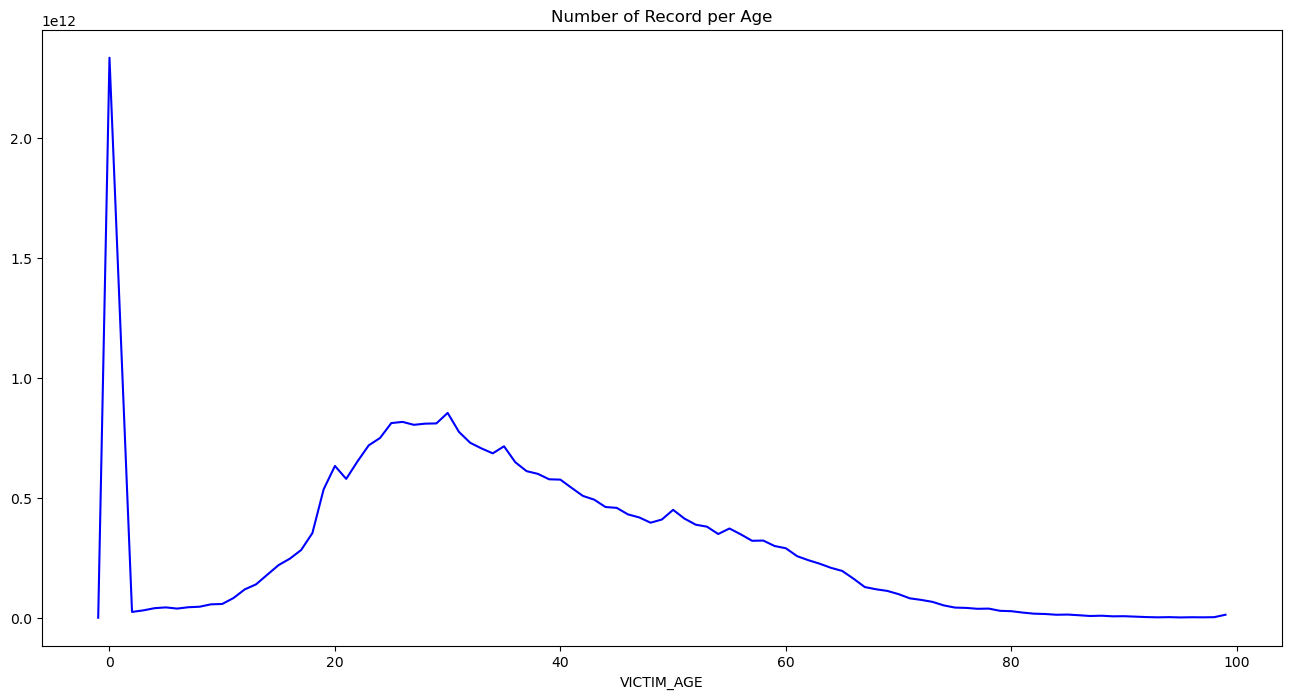

In [33]:
# Display data by Matplotlib function(Record Number VS Victim Age)
ax = df.groupby(['VICTIM_AGE'])['RECORD_NUMBER'].sum()
ax.plot(kind = 'line', figsize=(16, 8), color = 'blue')

plt.title("Number of Record per Age")

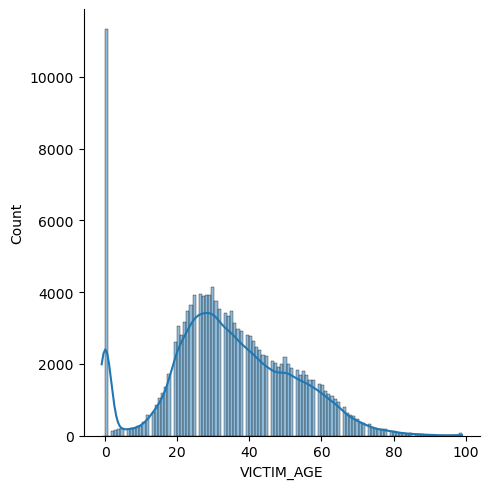

In [34]:
# Display the distribution curve by Seaborn function for the column Victim Age
sns.displot(df['VICTIM_AGE'], kde = True)

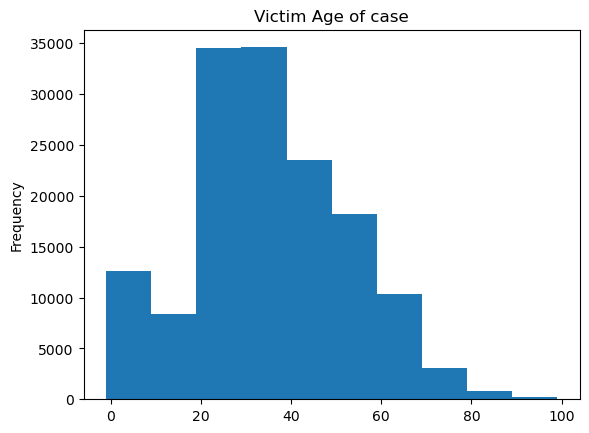

In [35]:
#Plot a histogram of the column 'Victim Age'
df['VICTIM_AGE'].plot(kind='hist')
plt.title('Victim Age of case')
plt.show()

The results shows between 20 and 30 is the highest victim range. 

# Outliers


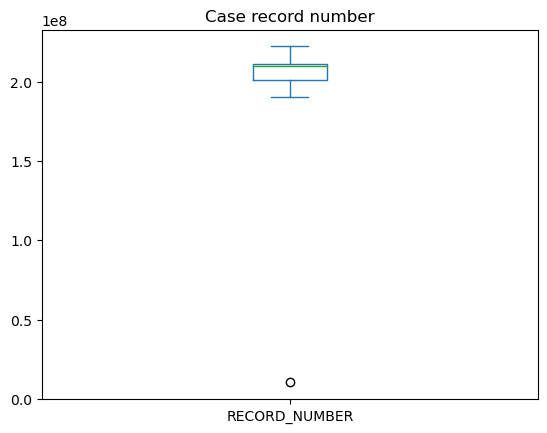

In [36]:
# Use a box plot to find outliers exsit in the column 'RECORD_NUMBER'

df['RECORD_NUMBER'].plot(kind='box')
plt.title('Case record number')
plt.show()


In [37]:
#Find out the Inter Quartile Range for the column RECORD_NUMBER.

# First quartile (Q1) 
Q1 = df['RECORD_NUMBER'].quantile(0.25) 
  
# Third quartile (Q3) 
Q3 = df['RECORD_NUMBER'].quantile(0.75)  
  
# Interquartile range (IQR) 
IQR = Q3 - Q1 
  
print(IQR)


9997754.5


In [38]:
#Find out the upper and lower bounds.
data_min, data_max = df['RECORD_NUMBER'].min(), df['RECORD_NUMBER'].max()
print('Min: ', data_min)
print('Max: ', data_max)


Min:  10304468
Max:  222113955


In [39]:
#Identify how many outliers are there in the RECORD_NUMBER column.
((df['RECORD_NUMBER'] < (Q1 - 1.5 * IQR)) | (df['RECORD_NUMBER'] > (Q3 + 1.5 * IQR))).value_counts()

False    146282
True          1
Name: RECORD_NUMBER, dtype: int64

In [40]:
#Create a new dataframe by removing the outliers from the RECORD_NUMBER column.
DF=(df['RECORD_NUMBER'] < (Q1 - 1.5 * IQR)) | (df['RECORD_NUMBER'] > (Q3 + 1.5 * IQR))
df['NewRECORD_NUMBER']=np.where(DF, '', df['RECORD_NUMBER'])
df.head(10)


RECORD_NUMBER  TIME_OF_OCCURRENCE  AREA_NAME  CRIME_CODE  \
0       10304468                2230  Southwest         624   
1      190101086                 330    Central         624   
2      200100501                  30    Central         121   
3      200100509                2200    Central         330   
4      200100510                 955    Central         930   
5      200100515                1638    Central         648   
6      211916029                 730    Mission         626   
7      201116159                2018  Northeast         626   
8      200506268                1900     Harbor         440   
9      200100535                1330    Central         210   

                            CRIME_CD_DESC  VICTIM_AGE VICTIM_SEX  PREMIS_CD  \
0                BATTERY - SIMPLE ASSAULT          36          F      501.0   
1                BATTERY - SIMPLE ASSAULT          25          M      102.0   
2                          RAPE, FORCIBLE          25          F      735.0   
3                   BURGLARY FROM VEHICLE          29          M      101.0   
4  CRIMINAL THREATS - NO WEAPON DISPLAYED          35          M      108.0   
5                                   ARSON           0          X      404.0   
6       INTIMATE PARTNER - SIMPLE ASSAULT          24          F      501.0   
7       INTIMATE PARTNER - SIMPLE ASSAULT          34          F      501.0   
8      THEFT PLAIN - PETTY ($950 & UNDER)          29          F      102.0   
9                                 ROBBERY          66          M      103.0   

                       PREMIS_DESC  WEAPON_USED_CODE  \
0           SINGLE FAMILY DWELLING             400.0   
1                         SIDEWALK             500.0   
2  NIGHT CLUB (OPEN EVENINGS ONLY)             500.0   
3                           STREET             306.0   
4                      PARKING LOT             511.0   
5                 DEPARTMENT STORE             500.0   
6           SINGLE FAMILY DWELLING             400.0   
7           SINGLE FAMILY DWELLING             400.0   
8                         SIDEWALK             400.0   
9                            ALLEY             204.0   

                                      WEAPON_DESC      LAT       LON  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  34.0141 -118.2978   
1                     UNKNOWN WEAPON/OTHER WEAPON  34.0459 -118.2545   
2                     UNKNOWN WEAPON/OTHER WEAPON  34.0452 -118.2534   
3                              ROCK/THROWN OBJECT  34.0359 -118.2648   
4                                   VERBAL THREAT  34.0615 -118.2412   
5                     UNKNOWN WEAPON/OTHER WEAPON  34.0480 -118.2577   
6  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  34.3055 -118.4439   
7  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  34.1186 -118.2450   
8  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  33.7926 -118.3043   
9                                   FOLDING KNIFE  34.0463 -118.2550   

  NewRECORD_NUMBER  
0                   
1        190101086  
2        200100501  
3        200100509  
4        200100510  
5        200100515  
6        211916029  
7        201116159  
8        200506268  
9        200100535

# Correlation



In [41]:
#Find the correlation between Vitcim Age and all other numerical columns.
df.corr()

RECORD_NUMBER  TIME_OF_OCCURRENCE  CRIME_CODE  VICTIM_AGE  \
RECORD_NUMBER            1.000000           -0.017619   -0.000135   -0.014066   
TIME_OF_OCCURRENCE      -0.017619            1.000000    0.015612    0.004738   
CRIME_CODE              -0.000135            0.015612    1.000000    0.039111   
VICTIM_AGE              -0.014066            0.004738    0.039111    1.000000   
PREMIS_CD                0.014608           -0.022358    0.197941    0.015711   
WEAPON_USED_CODE        -0.014454           -0.007886    0.376772    0.082903   
LAT                     -0.017408            0.007936   -0.035400    0.001150   
LON                      0.018487           -0.008065    0.036980   -0.000982   

                    PREMIS_CD  WEAPON_USED_CODE       LAT       LON  
RECORD_NUMBER        0.014608         -0.014454 -0.017408  0.018487  
TIME_OF_OCCURRENCE  -0.022358         -0.007886  0.007936 -0.008065  
CRIME_CODE           0.197941          0.376772 -0.035400  0.036980  
VICTIM_AGE           0.015711          0.082903  0.001150 -0.000982  
PREMIS_CD            1.000000          0.208514 -0.006195  0.007581  
WEAPON_USED_CODE     0.208514          1.000000 -0.017392  0.019371  
LAT                 -0.006195         -0.017392  1.000000 -0.999291  
LON                  0.007581          0.019371 -0.999291  1.000000

<AxesSubplot:>

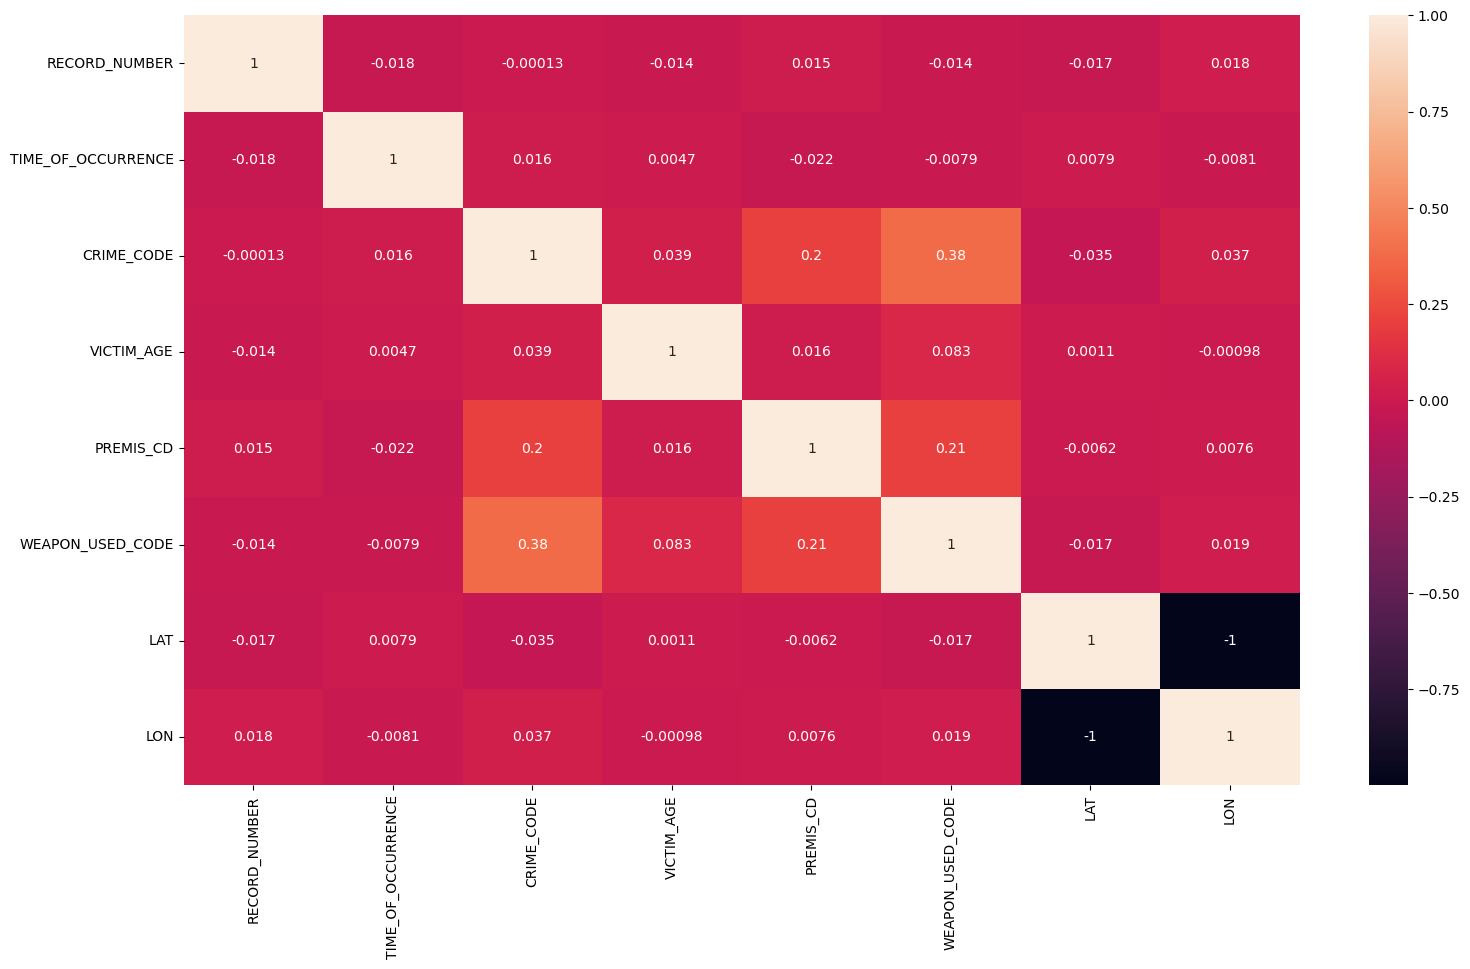

In [42]:
#Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)


In [43]:
# Classifying data into numerical features.
data_numerical = df[['CRIME_CODE', 'VICTIM_AGE','WEAPON_USED_CODE','TIME_OF_OCCURRENCE', 'PREMIS_CD']]

In [44]:
#Check Sknewness and Kurtosis
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

Columns  Skewness  Kurtosis
0          CRIME_CODE -0.034162 -1.307704
1          VICTIM_AGE  0.095519 -0.091942
2    WEAPON_USED_CODE -0.979445 -0.071281
3  TIME_OF_OCCURRENCE -0.469447 -0.824905
4           PREMIS_CD  0.414446 -1.035052

In [45]:
#General Rule : 
#1) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#1)Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails. The value is oftencompared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the datasethas heavier tails than a normal distribution . If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution.

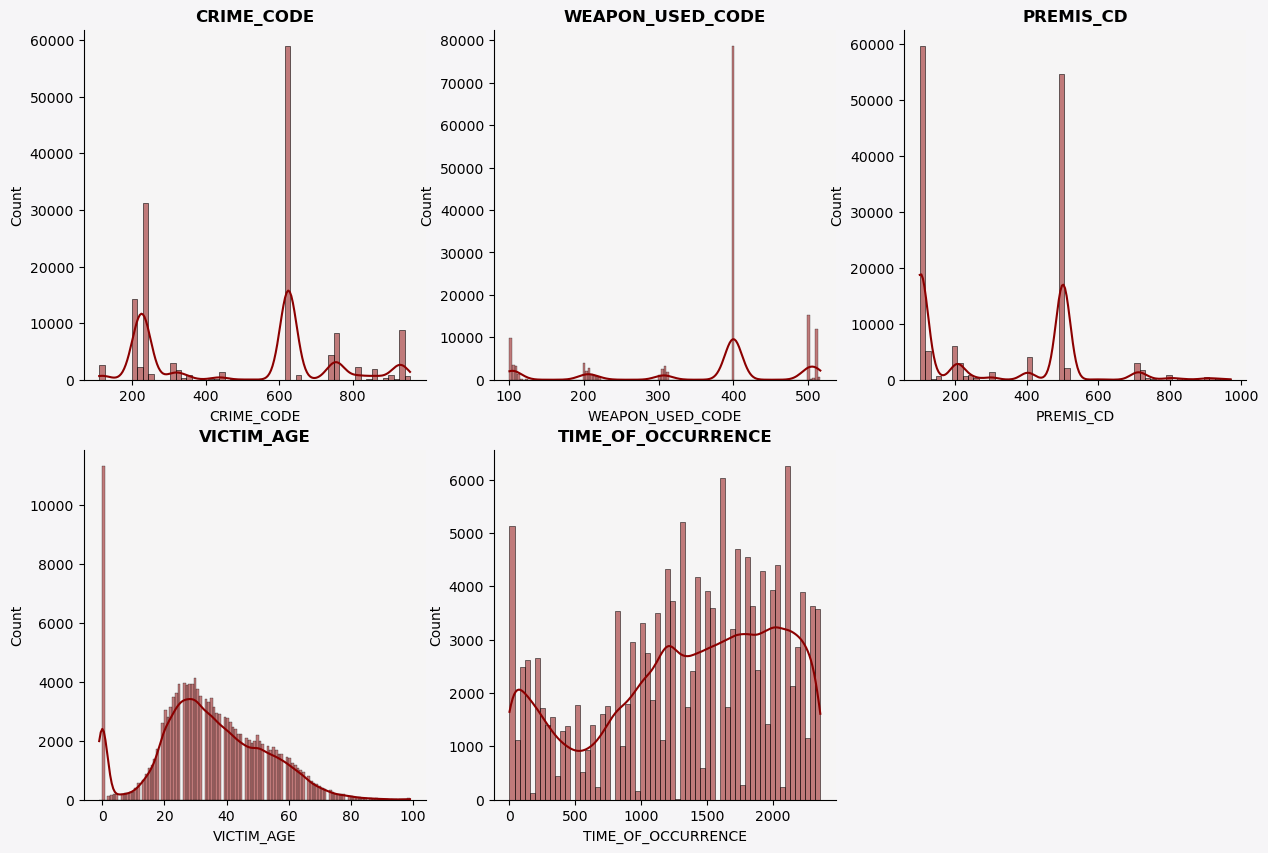

In [46]:
#Visualising ('different numerical features' VS 'Record Number')
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.patch.set_facecolor('#f6f5f7')
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],x=data_numerical[idx],color='darkred',kde=True,alpha=0.5)
    ax[i%2,i//2].set_title(idx,fontweight='bold')
    ax[i%2,i//2].set_facecolor('#f6f5f5')
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

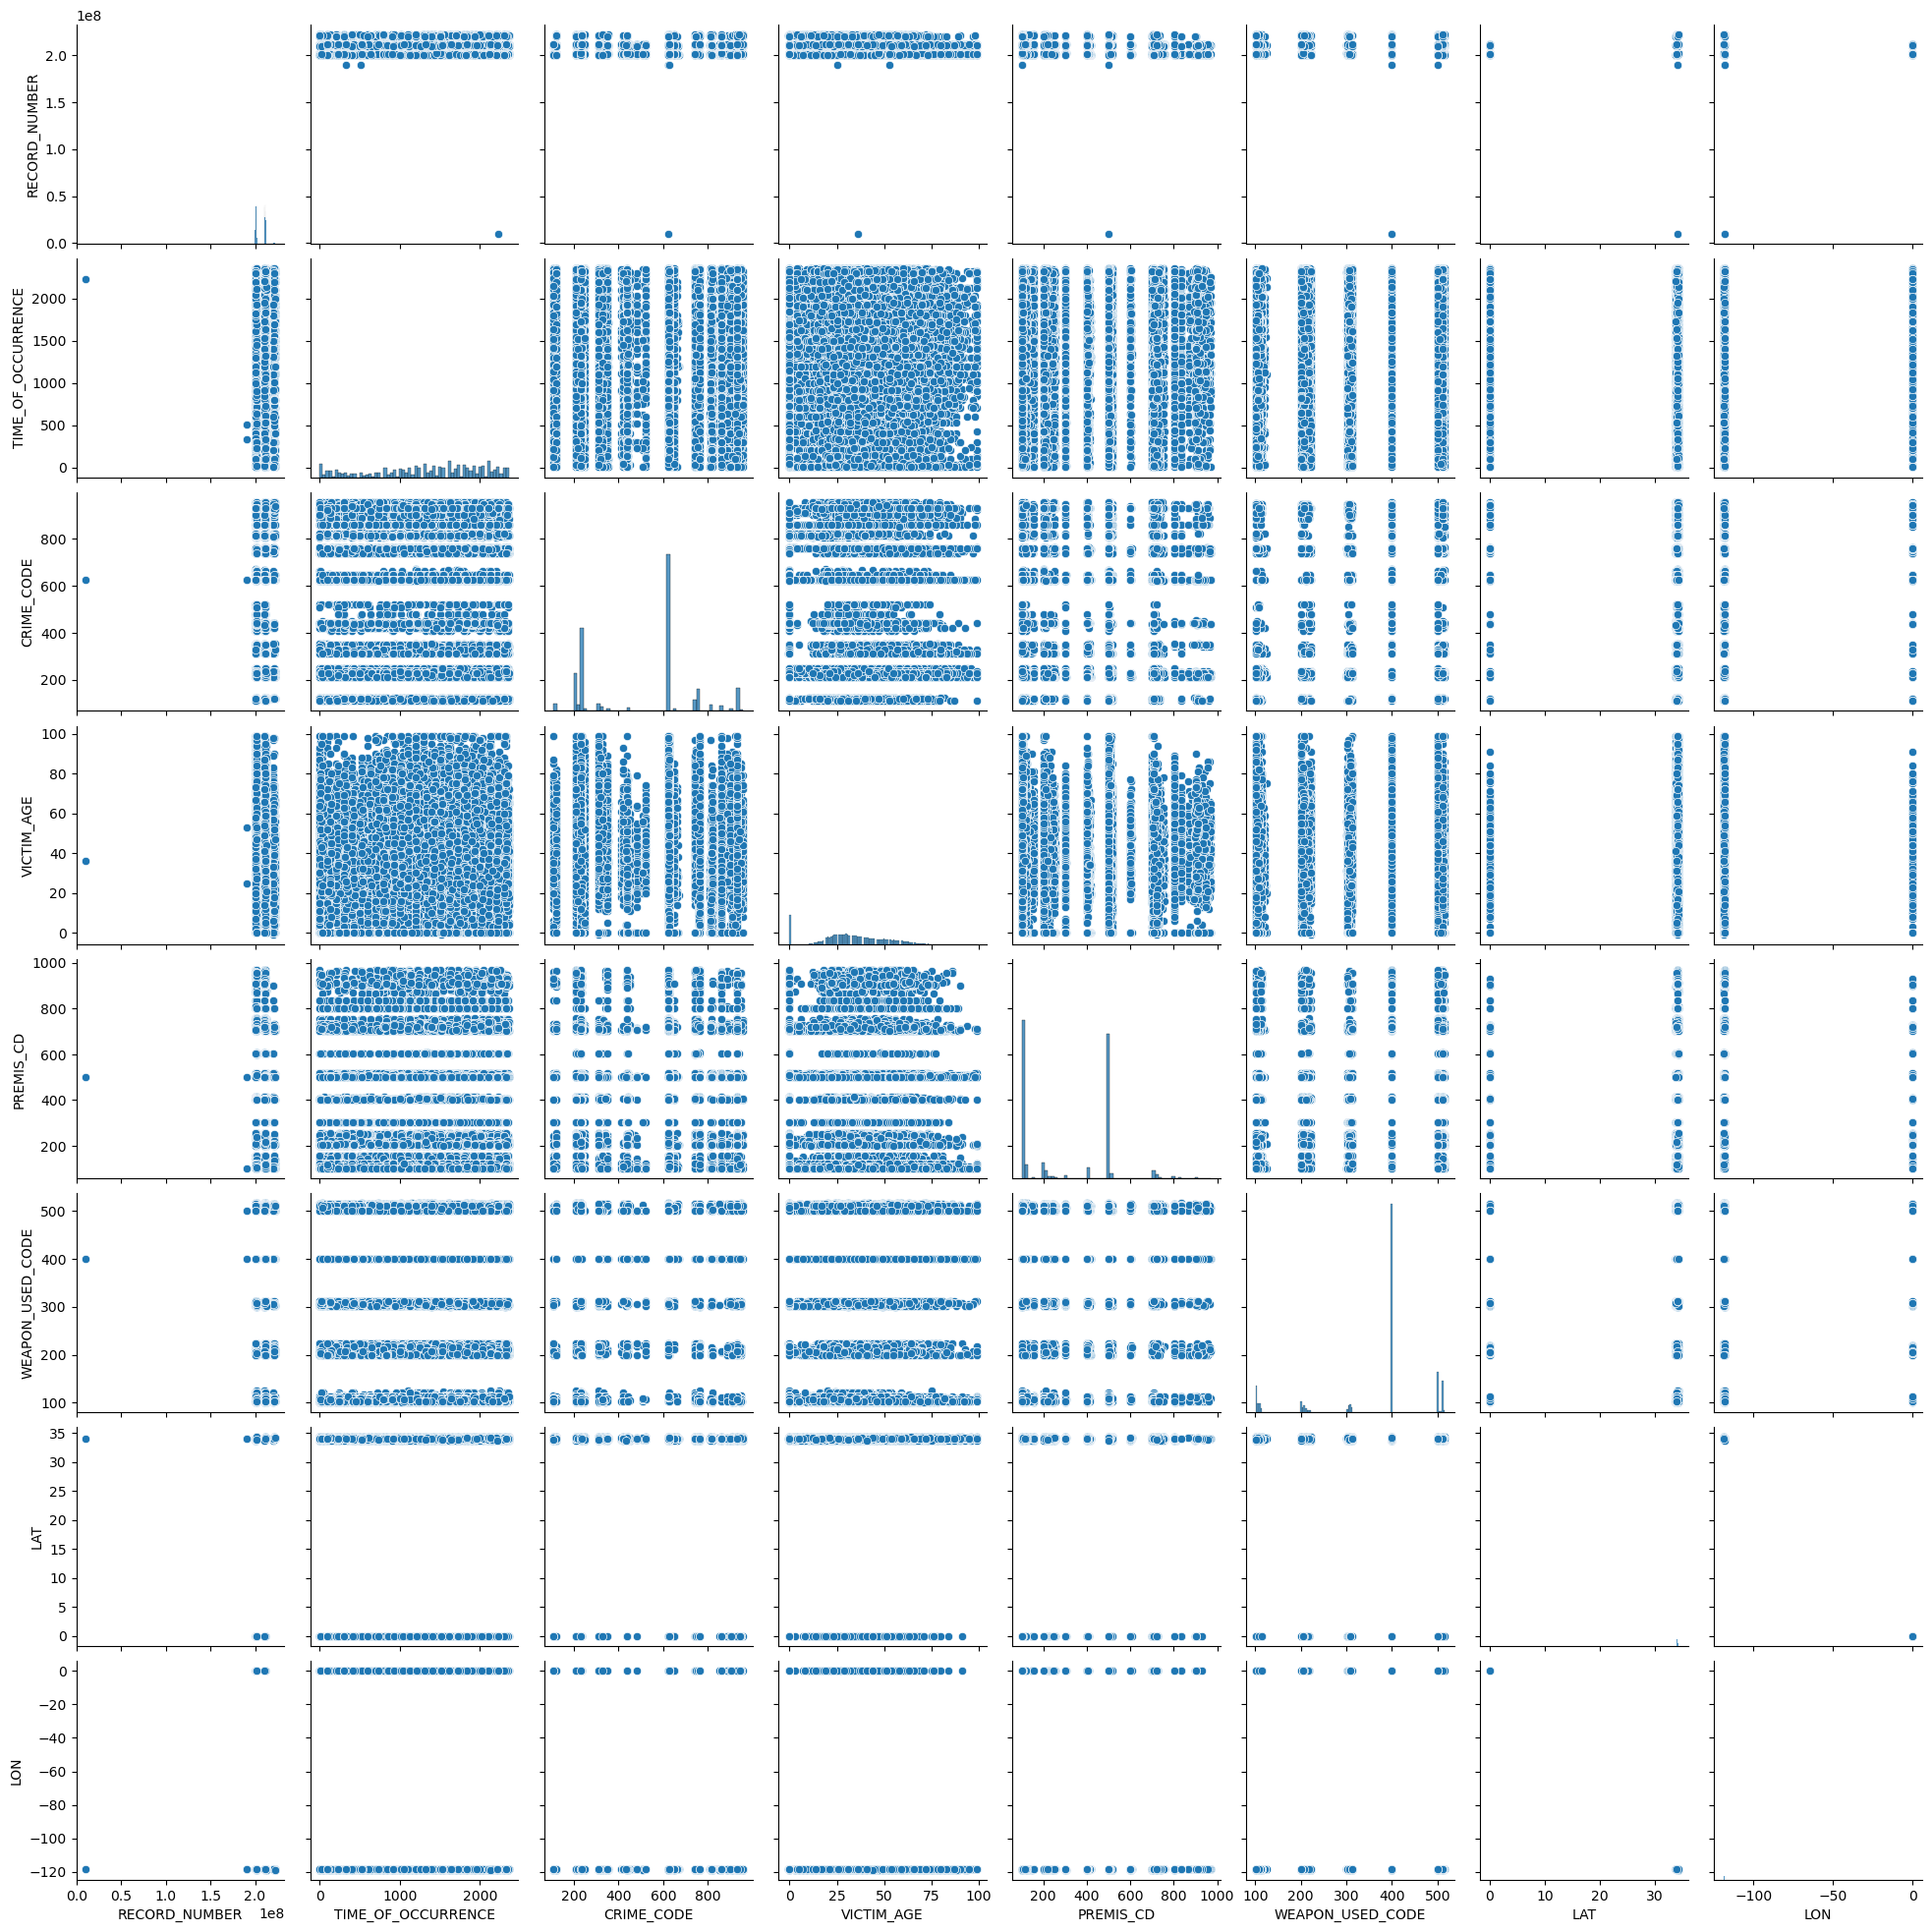

In [47]:
#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variables

sns.pairplot(df)
plt.show()

# Conclusion 

In summary, this EDA shows:

The most frequent "crime" area is 77th Street while the second most is Central. Man victim is highest victim sex, which higher than female victim. Most of the victim age is between 20 and 30.

From the heatmap display, I observed that Weapon used type and crime type are highly correlated with crime record number. I will do further analyse later. 

About Dataset

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data.


www.kaggle.com/datasets/ssarkar445/crime-data-los-angeles